In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
cap = cv.VideoCapture("C:\\Users\isakb\OneDrive - Chalmers University of Technology\Holografidata\PSL240_noGoldEvery1_1_movie_1.avi")

In [3]:
frame_number = 300
cap.set(cv.CAP_PROP_POS_FRAMES, frame_number)
res, frame = cap.read()

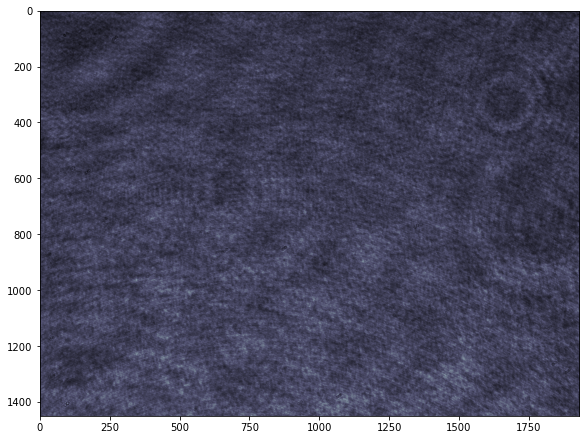

In [12]:
gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
gray_frame = gray_frame.astype(float)
plt.figure(figsize = (1450 / 150, 1930 / 150))
plt.imshow(gray_frame, cmap = 'bone')
plt.show()

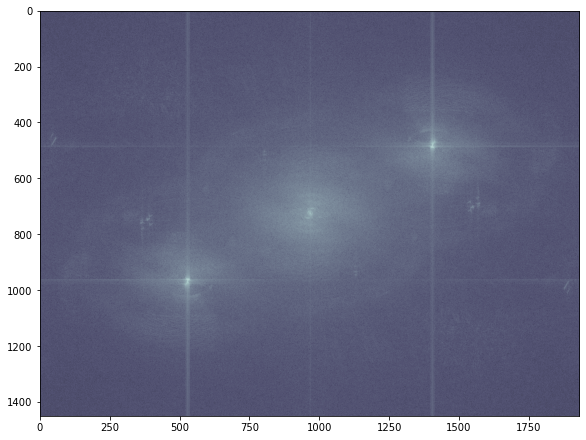

In [5]:
ft_of_frame = np.fft.fft2(gray_frame)
ft_of_frame = np.fft.fftshift(ft_of_frame)
plt.figure(figsize = (1450 / 150, 1930 / 150))
plt.imshow(np.log(np.abs(ft_of_frame)), cmap = 'bone')

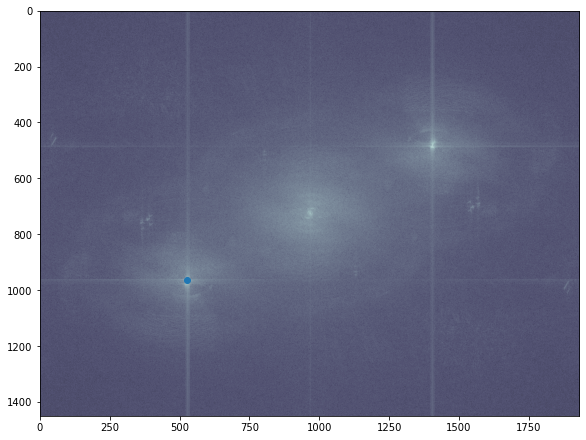

In [6]:
# Crop image to identify the maximum we'll use for cropping
sz = ft_of_frame.shape
crop = ft_of_frame[800:, :650]
# plt.figure()
# plt.imshow(np.log(abs(crop)), cmap = 'bone')
res = np.where(abs(crop) == np.amax(abs(crop)))
res = list(zip(res[0], res[1]))[0]
# plt.scatter(res[1], res[0])

ap_cent = (800 + res[0] + 1, res[1])

plt.figure(figsize = (1450 / 150, 1930 / 150))
plt.imshow(np.log(np.abs(ft_of_frame)), cmap = 'bone')
plt.scatter(ap_cent[1], ap_cent[0])

C:\Users\isakb\AppData\Local\Temp\ipykernel_2920\80718933.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(transformed_im)), cmap = 'bone')


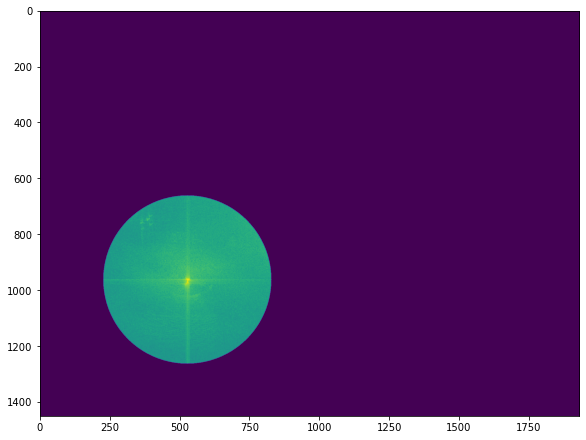

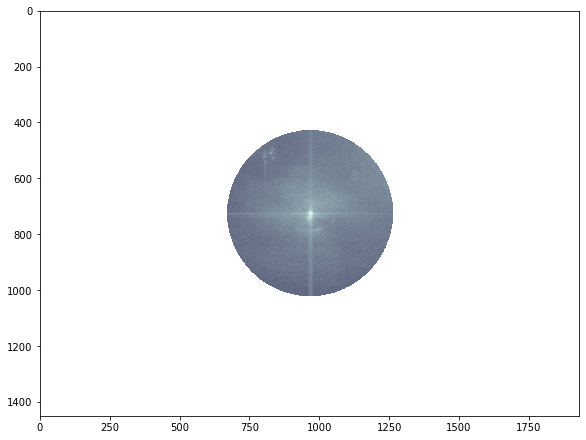

In [7]:
grid = np.mgrid[0:sz[0], 0:sz[1]]
grid[0] -= ap_cent[0]
grid[1] -= ap_cent[1]

r = 300
mask = grid[0] ** 2 + grid[1] ** 2 <= r ** 2
absField = np.log(np.abs(ft_of_frame))
absField[~mask] = 0
plt.figure(figsize = (1450 / 150, 1930 / 150))
plt.imshow(absField)

new_grid = np.mgrid[0:sz[0], 0:sz[1]]
new_grid[0] = new_grid[0] - sz[0] / 2
new_grid[1] = new_grid[1] - sz[1] / 2


area_to_fill = new_grid[0] ** 2 + new_grid[1] ** 2 <= r ** 2

transformed_im = np.zeros(sz) + 1j * np.zeros(sz)
transformed_im[area_to_fill] = ft_of_frame[mask]

plt.figure(figsize = (1450 / 150, 1930 / 150))
plt.imshow(np.log(np.abs(transformed_im)), cmap = 'bone')


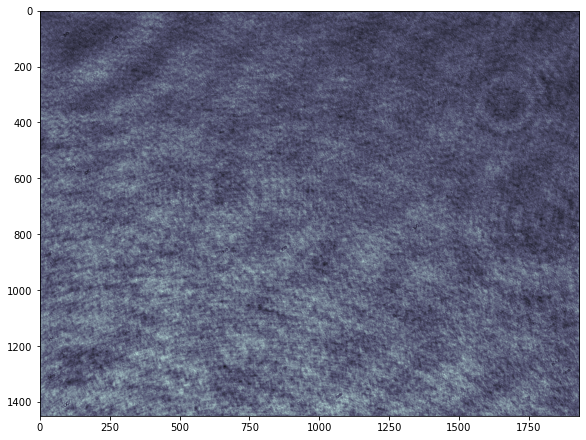

In [11]:
# Do the inverse transform
final_im = np.fft.ifft2(transformed_im)
plt.figure(figsize = (1450 / 150, 1930 / 150))
plt.imshow(np.abs(final_im), cmap = 'bone')